# Analysis

##### We looked into a research study of different drugs that scientist are trying to see the results of which drug is most affective against the tumors of lab mice within a 45 day time period to see which drug was the most affective. Based on the received data we have drawn the following conclusions that the data supports.

###### 1.	Found that the data is a bit biased as 2 drugs, Capomulin, and Ramican, were given higher than the average mice in our data set was tested per drug which causes some outliers in our over all data. It also brings us to question where these 2 drugs used in a previous study before and we are comparing old results to new one?
###### 2.	We also found that the 2 drugs Infubinol and Ceftamin have been found in our data to end up with higher Tumor Volume in our mice under these treatments. Our boxplot proves it that the upper percentile of the mice under these treatments ended up with tumor about 50 mm^3 large at the end of their time points. 
###### 3.	 We also can conclude from our data that the higher the weight of the mouse the larger the tumor size is. Our scatter plot shows this especially in our Capomulin drug as the higher the weight of all the mice is directly proportional to the avg size of the tumor of the mice of the same weight.


# Observations and Insights

In [50]:
# Dependencies and Setup
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
import numpy as np
import seaborn as sn
import os
from scipy import stats

In [51]:

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
df = pd.merge(study_results, mouse_metadata, on="Mouse ID", how="left")
df = df.rename(columns={"Mouse ID": "Mouse_ID"})
# Display the data table for preview
df.head()

,Mouse_ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1893 entries, 0 to 1892
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Mouse_ID            1893 non-null   object 
 1   Timepoint           1893 non-null   int64  
 2   Tumor Volume (mm3)  1893 non-null   float64
 3   Metastatic Sites    1893 non-null   int64  
 4   Drug Regimen        1893 non-null   object 
 5   Sex                 1893 non-null   object 
 6   Age_months          1893 non-null   int64  
 7   Weight (g)          1893 non-null   int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 133.1+ KB


In [53]:
df.shape

(1893, 8)

In [54]:
# Checking the number of mice.
df = df.rename(columns={"Mouse ID": "Mouse_ID"})
df

,Mouse_ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [55]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
df.groupby(['Mouse_ID', "Timepoint"]).size().sort_values(ascending=False)

Mouse_ID  Timepoint
g989      20           2
          15           2
          10           2
          5            2
          0            2
                      ..
i334      20           1
          15           1
          10           1
          5            1
z969      45           1
Length: 1888, dtype: int64

In [56]:
# Optional: Get all the data for the duplicate mouse ID. 
mask = df.Mouse_ID == "g989"
df.loc[mask]

,Mouse_ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [57]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mask = df.Mouse_ID != "g989"

df_clean = df.loc[mask].reset_index(drop=True)

df_clean

,Mouse_ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1875,r944,45,41.581521,2,Capomulin,Male,12,25
1876,u364,45,31.023923,3,Capomulin,Male,18,17
1877,p438,45,61.433892,1,Ceftamin,Female,11,26
1878,x773,45,58.634971,4,Placebo,Female,21,30


In [58]:
# Checking the number of mice in the clean DataFrame.
new_tot_mice = df_clean.Mouse_ID.nunique()
new_tot_mice

248

## Summary Statistics

In [59]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
drug_avgs = df_clean.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
drug_meds = df_clean.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
drug_stds = df_clean.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
drug_vars = df_clean.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
drug_sems = df_clean.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()


In [60]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
summ1 = pd.concat([drug_avgs, drug_meds, drug_stds, drug_vars, drug_sems], axis=1)
summ1.columns = ["Mean", "Median", "St_Dev", "Variance", "SEM"]
summ1

,Mean,Median,St_Dev,Variance,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,4.994774,24.947764,0.329346
Ceftamin,52.591172,51.776157,6.268188,39.290177,0.469821
Infubinol,52.884795,51.820584,6.567243,43.128684,0.492236
Ketapril,55.235638,53.698743,8.279709,68.553577,0.603860
Naftisol,54.331565,52.509285,8.134708,66.173479,0.596466
Placebo,54.033581,52.288934,7.821003,61.168083,0.581331
Propriva,52.320930,50.446266,6.622085,43.852013,0.544332
Ramicane,40.216745,40.673236,4.846308,23.486704,0.320955
Stelasyn,54.233149,52.431737,7.710419,59.450562,0.573111


In [61]:
# Using the aggregation method, produce the same summary statistics in a single line
df_clean.groupby("Drug Regimen").agg({"Tumor Volume (mm3)": ["mean", "median", "std", "var", "sem"]})

Tumor Volume (mm3)                                          
                           mean     median       std        var       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  4.994774  24.947764  0.329346
Ceftamin              52.591172  51.776157  6.268188  39.290177  0.469821
Infubinol             52.884795  51.820584  6.567243  43.128684  0.492236
Ketapril              55.235638  53.698743  8.279709  68.553577  0.603860
Naftisol              54.331565  52.509285  8.134708  66.173479  0.596466
Placebo               54.033581  52.288934  7.821003  61.168083  0.581331
Propriva              52.320930  50.446266  6.622085  43.852013  0.544332
Ramicane              40.216745  40.673236  4.846308  23.486704  0.320955
Stelasyn              54.233149  52.431737  7.710419  59.450562  0.573111
Zoniferol             53.236507  51.818479  6.966589  48.533355  0.516398

## Bar and Pie Charts

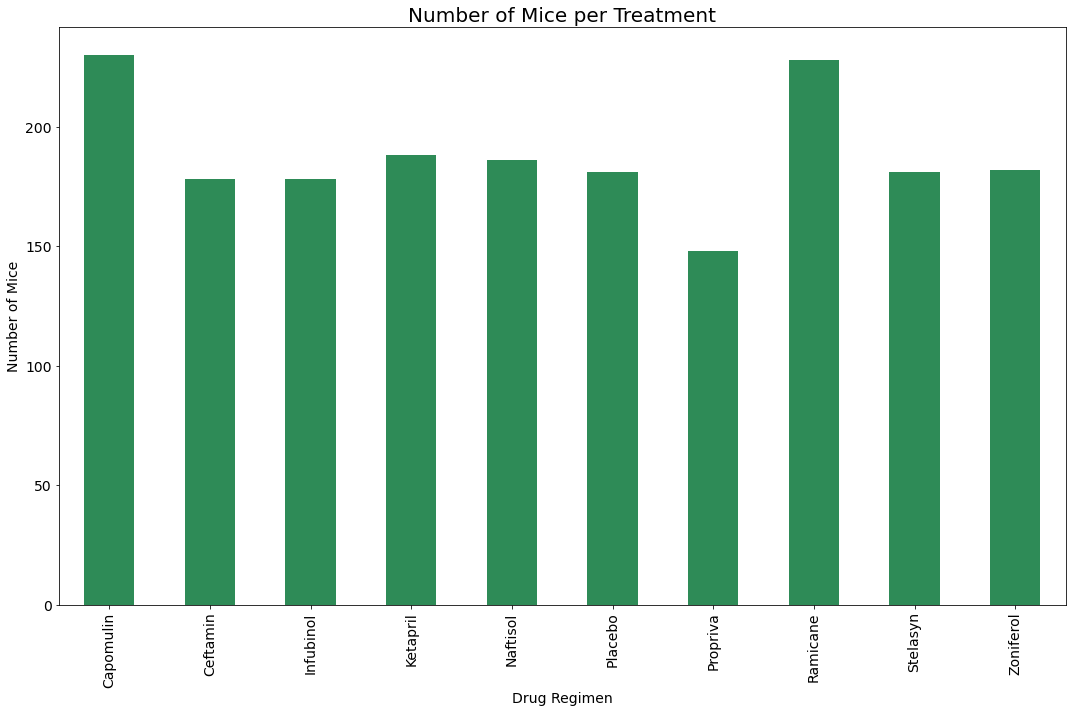

In [62]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
count_mice_per_drug = df_clean.groupby(["Drug Regimen"]).count()["Mouse_ID"] 


plot_pandas = count_mice_per_drug.plot.bar(figsize=(15,10), color='seagreen',fontsize = 14)

plt.xlabel("Drug Regimen",fontsize = 14)
plt.ylabel("Number of Mice",fontsize = 14)
plt.title("Number of Mice per Treatment",fontsize = 20)

plt.savefig("../Images/Pandas_mice_per_treat.png", bbox_inches = "tight")
plt.tight_layout()
plt.show()


In [63]:
mice_list = (df_clean.groupby(["Drug Regimen"])["Mouse_ID"].count()).tolist()
mice_list

[230, 178, 178, 188, 186, 181, 148, 228, 181, 182]

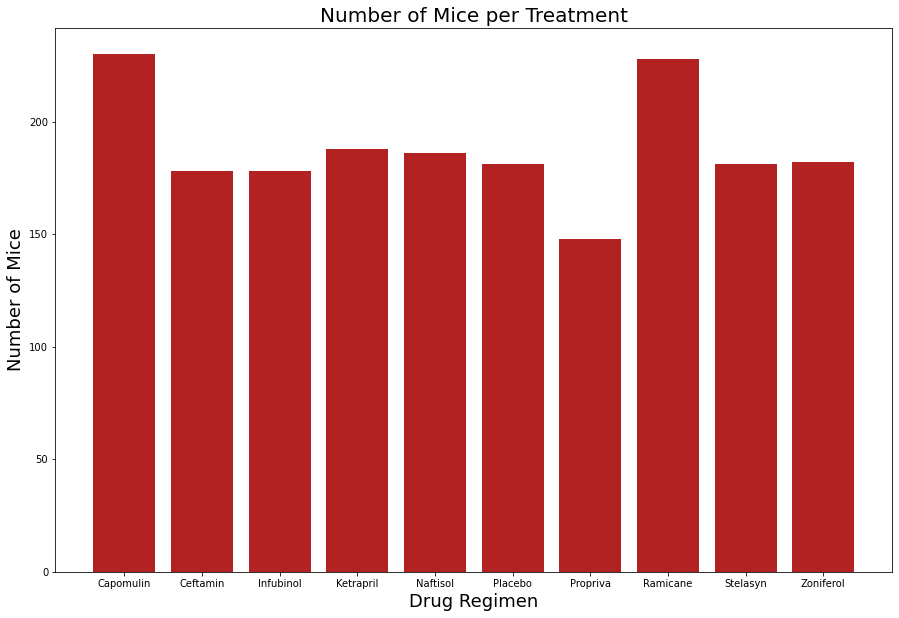

In [64]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
drug_names = ["Capomulin", "Ceftamin", "Infubinol", "Ketrapril", "Naftisol", "Placebo", "Propriva", "Ramicane", "Stelasyn", "Zoniferol"]
x_axis = np.arange(len(count_mice_per_drug))

plt.figure(figsize=(15,10))
plt.bar(x_axis, mice_list, color="firebrick", align="center")
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, drug_names)

# Give the chart a title, x label, and y label
plt.xlabel("Drug Regimen",fontsize = 18)
plt.ylabel("Number of Mice",fontsize = 18)
plt.title("Number of Mice per Treatment",fontsize = 20)

plt.savefig("../Images/matplot_mice_per_treat.png", bbox_inches = "tight")

In [65]:
gender_group  = df.groupby(["Mouse_ID", "Sex"]) 
gender_df = pd.DataFrame(gender_group.size())
gender_df

,,0
Mouse_ID,Sex,
a203,Female,10
a251,Female,10
a262,Female,10
a275,Female,10
a366,Female,7
...,...,...
z435,Female,3
z578,Male,10
z581,Female,10


In [66]:
mouse_gender = pd.DataFrame(gender_df.groupby(["Sex"]).count())
mouse_gender.columns = ["Total Count"]
mouse_gender["Percentage of Sex"] = (100*(mouse_gender["Total Count"]/mouse_gender["Total Count"].sum()))
mouse_gender["Percentage of Sex"] = mouse_gender["Percentage of Sex"].map("{:,.2f}%".format)
# format the "Percentage of Sex" column
mouse_gender["Percentage of Sex"] = mouse_gender["Percentage of Sex"]
mouse_gender

,Total Count,Percentage of Sex
Sex,,
Female,124,49.80%
Male,125,50.20%


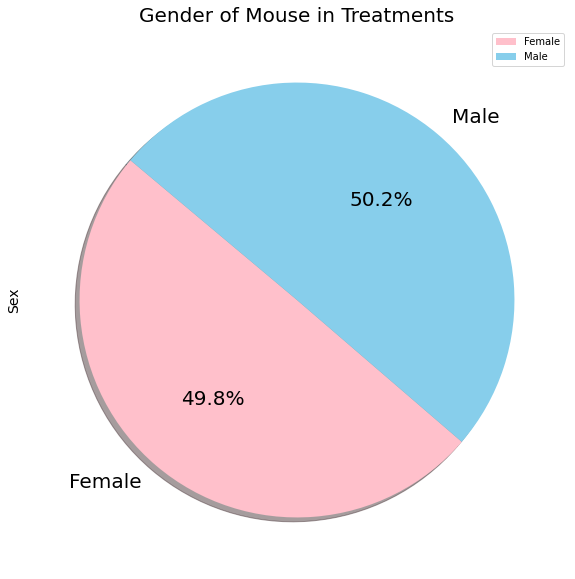

In [67]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
colors = ["Pink", "SKyBlue"]

pie_pandas = mouse_gender.plot.pie(y='Total Count', figsize=(15,10), fontsize = 20, colors=colors, startangle=140, shadow = True, autopct="%1.1f%%")
plt.ylabel('Sex',fontsize = 14)
plt.title('Gender of Mouse in Treatments',fontsize = 20)
plt.savefig("../Images/Pan_Gender_Pies.png")
plt.show()


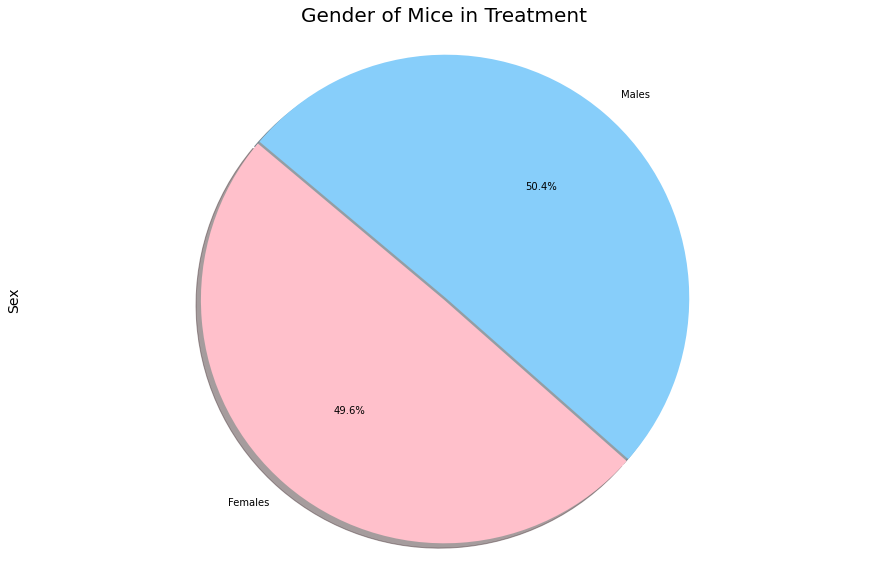

In [68]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ["Females", "Males"]

# The values of each section of the pie chart
sizes = [123, 125]

# The colors of each section of the pie chart
colors = ["pink", "lightskyblue"]

# How much we want to split the pie 
explode = (0.01, 0,)

# Tell matplotlib to create a pie chart based upon the above data
plt.figure(figsize=(15,10))
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
# Create axes which are equal so we have a perfect circle
plt.axis("equal")
plt.ylabel('Sex',fontsize = 14)

plt.title("Gender of Mice in Treatment",fontsize = 20)
# Save an image of our chart and print the final product to the screen
plt.savefig("../Images/Mat_Gender_Pies.png")

plt.show()



## Quartiles, Outliers and Boxplots

In [69]:
# set each drug of Capomulin, Ramicane, Infubinol, and Ceftamin to a dataframe
capomulin_df = df_clean.loc[df_clean["Drug Regimen"] == "Capomulin",:]
ramicane_df = df_clean.loc[df_clean["Drug Regimen"] == "Ramicane",:]
infubinol_df = df_clean.loc[df_clean["Drug Regimen"] == "Infubinol",:]
ceftamin_df = df_clean.loc[df_clean["Drug Regimen"] == "Ceftamin",:]
capomulin_df

,Mouse_ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
224,j246,0,45.000000,0,Capomulin,Female,21,21
225,r554,0,45.000000,0,Capomulin,Female,8,17
226,s185,0,45.000000,0,Capomulin,Female,3,17
227,b742,0,45.000000,0,Capomulin,Male,7,21
...,...,...,...,...,...,...,...,...
1841,s710,45,40.728578,1,Capomulin,Female,1,23
1846,j119,45,38.125164,1,Capomulin,Female,7,23
1865,i557,45,47.685963,1,Capomulin,Female,1,24
1875,r944,45,41.581521,2,Capomulin,Male,12,25


In [70]:
# Calculate the final tumor volume of each mouse across the Capomulin treatment regimen: 

In [71]:
#Capomulin
# Start by getting the last (greatest) timepoint for each mouse
caplast = capomulin_df.groupby('Mouse_ID').max()['Timepoint']
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
caplastvol = pd.DataFrame(caplast)
caplastmerge = pd.merge(caplastvol, df_clean, on=("Mouse_ID","Timepoint"),how="left")
caplastmerge.head(20)

,Mouse_ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,45,38.982878,2,Capomulin,Female,9,22
1,b742,45,38.939633,0,Capomulin,Male,7,21
2,f966,20,30.485985,0,Capomulin,Male,16,17
3,g288,45,37.074024,1,Capomulin,Male,3,19
4,g316,45,40.159220,2,Capomulin,Female,22,22
5,i557,45,47.685963,1,Capomulin,Female,1,24
6,i738,45,37.311846,2,Capomulin,Female,23,20
7,j119,45,38.125164,1,Capomulin,Female,7,23
8,j246,35,38.753265,1,Capomulin,Female,21,21
9,l509,45,41.483008,3,Capomulin,Male,17,21


In [72]:
# Put treatments into a list for for loop (and later for plot labels)

cap_tumors = caplastmerge["Tumor Volume (mm3)"]

# Calculate the IQR and quantitatively determine if there are any potential outliers.(Matplotlib day 3 activity 3)
quartiles = cap_tumors.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
    


lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Mice that got the Capomulin treatment could have tumor volumes below {lower_bound} which could be outliers.")
print(f"Mice that got the Capomulin treatment could have tumor volumes below {upper_bound} which could be outliers.")

Mice that got the Capomulin treatment could have tumor volumes below 20.70456164999999 which could be outliers.
Mice that got the Capomulin treatment could have tumor volumes below 51.83201549 which could be outliers.


In [73]:
#Ramicane
# Start by getting the last (greatest) timepoint for each mouse
ramlast = ramicane_df.groupby('Mouse_ID').max()['Timepoint']
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
ramlastvol = pd.DataFrame(ramlast)
ramlastmerge = pd.merge(ramlastvol, df_clean, on=("Mouse_ID","Timepoint"),how="left")
ramlastmerge.head()

,Mouse_ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a411,45,38.407618,1,Ramicane,Male,3,22
1,a444,45,43.047543,0,Ramicane,Female,10,25
2,a520,45,38.810366,1,Ramicane,Male,13,21
3,a644,45,32.978522,1,Ramicane,Female,7,17
4,c458,30,38.342008,2,Ramicane,Female,23,20


In [74]:
# Put treatments into a list for for loop (and later for plot labels)

ram_tumors = ramlastmerge["Tumor Volume (mm3)"]

# Calculate the IQR and quantitatively determine if there are any potential outliers.(Matplotlib day 3 activity 3)
quartiles = ram_tumors.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
    


lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Mice that got the Ramicane treatment could have tumor volumes below {lower_bound} which could be outliers.")
print(f"Mice that got the Ramicane treatment could have tumor volumes below {upper_bound} which could be outliers.")

Mice that got the Ramicane treatment could have tumor volumes below 17.912664470000003 which could be outliers.
Mice that got the Ramicane treatment could have tumor volumes below 54.30681135 which could be outliers.


In [75]:
#Infubinol
# Start by getting the last (greatest) timepoint for each mouse
inflast = infubinol_df.groupby('Mouse_ID').max()['Timepoint']
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
inflastvol = pd.DataFrame(inflast)
inflastmerge = pd.merge(inflastvol, df_clean, on=("Mouse_ID","Timepoint"),how="left")
inflastmerge.head()

,Mouse_ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a577,30,57.031862,2,Infubinol,Female,6,25
3,a685,45,66.083066,3,Infubinol,Male,8,30
4,c139,45,72.226731,2,Infubinol,Male,11,28


In [76]:
# Put treatments into a list for for loop (and later for plot labels)

inf_tumors = inflastmerge["Tumor Volume (mm3)"]

# Calculate the IQR and quantitatively determine if there are any potential outliers.(Matplotlib day 3 activity 3)
quartiles = inf_tumors.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
    


lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Mice that got the Infubinol treatment could have tumor volumes below {lower_bound} which could be outliers.")
print(f"Mice that got the Infubinol treatment could have tumor volumes below {upper_bound} which could be outliers.")

Mice that got the Infubinol treatment could have tumor volumes below 36.83290494999999 which could be outliers.
Mice that got the Infubinol treatment could have tumor volumes below 82.74144559000001 which could be outliers.


In [77]:
#Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
ceflast = ceftamin_df.groupby('Mouse_ID').max()['Timepoint']
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
ceflastvol = pd.DataFrame(ceflast)
ceflastmerge = pd.merge(ceflastvol, df_clean, on=("Mouse_ID","Timepoint"),how="left")
ceflastmerge.head()

,Mouse_ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a275,45,62.999356,3,Ceftamin,Female,20,28
1,b447,0,45.000000,0,Ceftamin,Male,2,30
2,b487,25,56.057749,1,Ceftamin,Female,6,28
3,b759,30,55.742829,1,Ceftamin,Female,12,25
4,f436,15,48.722078,2,Ceftamin,Female,3,25


In [78]:
# Put treatments into a list for for loop (and later for plot labels)

cef_tumors = ceflastmerge["Tumor Volume (mm3)"]

# Calculate the IQR and quantitatively determine if there are any potential outliers.(Matplotlib day 3 activity 3)
quartiles = cef_tumors.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
    


lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Mice that got the Ceftamin treatment could have tumor volumes below {lower_bound} which could be outliers.")
print(f"Mice that got the Ceftamin treatment could have tumor volumes below {upper_bound} which could be outliers.")

Mice that got the Ceftamin treatment could have tumor volumes below 25.355449580000002 which could be outliers.
Mice that got the Ceftamin treatment could have tumor volumes below 87.66645829999999 which could be outliers.


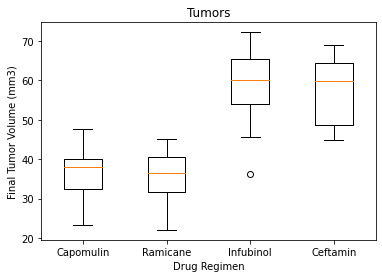

In [79]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
data_to_plot = [cap_tumors, ram_tumors, inf_tumors, cef_tumors]

fig1, ax1 = plt.subplots()
ax1.set_title('Tumors')
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.set_xlabel('Drug Regimen')

ax1.boxplot(data_to_plot, labels=["Capomulin","Ramicane","Infubinol","Ceftamin",])

plt.savefig('Tumor_Volume_vs_Drug_Regimen_boxplot')
plt.show()

## Line and Scatter Plots

In [80]:
forline_df = capomulin_df.loc[capomulin_df["Mouse_ID"] == "m957",:]
forline_df.head(10)

,Mouse_ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
245,m957,0,45.000000,0,Capomulin,Female,3,19
483,m957,5,45.622381,1,Capomulin,Female,3,19
549,m957,10,46.414518,1,Capomulin,Female,3,19
742,m957,15,39.804453,1,Capomulin,Female,3,19
953,m957,20,38.909349,1,Capomulin,Female,3,19
1258,m957,25,37.695432,1,Capomulin,Female,3,19
1391,m957,30,38.212479,1,Capomulin,Female,3,19
1600,m957,35,32.562839,1,Capomulin,Female,3,19
1693,m957,40,32.947615,1,Capomulin,Female,3,19
1787,m957,45,33.329098,1,Capomulin,Female,3,19


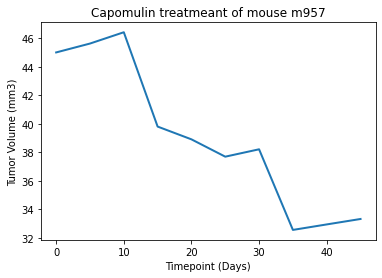

In [81]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

x_axisTP = forline_df["Timepoint"]
tumsiz = forline_df["Tumor Volume (mm3)"]

plt.title('Capomulin treatmeant of mouse m957')
plt.plot(x_axisTP, tumsiz,linewidth=2, markersize=12)
plt.xlabel('Timepoint (Days)')
plt.ylabel('Tumor Volume (mm3)')

plt.savefig('Cap_m957_linechart')
plt.show()

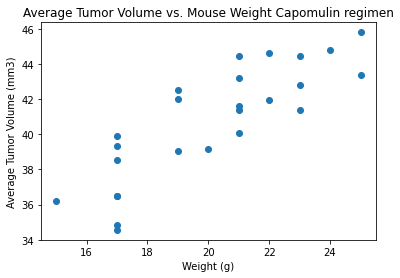

In [82]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
cap_avg = capomulin_df.groupby(['Mouse_ID']).mean()
plt.scatter(cap_avg['Weight (g)'],cap_avg['Tumor Volume (mm3)'])


plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Average Tumor Volume vs. Mouse Weight Capomulin regimen')
plt.savefig('Tumor_vs_Weight_scatterplot')
plt.show()

## Correlation and Regression

In [86]:
# Calculate the correlation coefficient
cap_corr = round(st.pearsonr(capomulin_df['Weight (g)'],capomulin_df['Tumor Volume (mm3)'])[0],2)
print(f"The correlation coefficient between the Weight of the mice in the Capomulin treatment and there tummer volume is {cap_corr}")

The correlation coefficient between the Weight of the mice in the Capomulin treatment and there tummer volume is 0.53


In [92]:
#linear Regression 
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
linregress(x_values, y_values)


LinregressResult(slope=0.9544396890241049, intercept=21.552160532685008, rvalue=0.8419363424694721, pvalue=1.3225722434712404e-07, stderr=0.12754359033201323, intercept_stderr=2.5909876867683455)

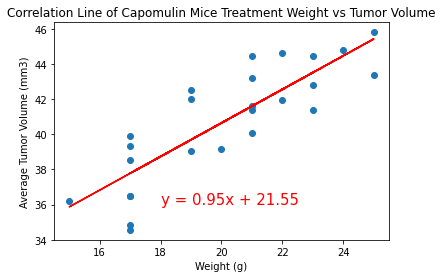

In [93]:

# for mouse weight and average tumor volume for the Capomulin regimen
# Print out the r-squared value along with the plot.
# Add the linear regression equation and line to plot
x_values = cap_avg['Weight (g)']
y_values = cap_avg['Tumor Volume (mm3)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(18,36),fontsize=15,color="red")
plt.title('Correlation Line of Capomulin Mice Treatment Weight vs Tumor Volume')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()

In [94]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

In [95]:
linregress(x_values, y_values)

LinregressResult(slope=0.9544396890241049, intercept=21.552160532685008, rvalue=0.8419363424694721, pvalue=1.3225722434712404e-07, stderr=0.12754359033201323, intercept_stderr=2.5909876867683455)

In [96]:
preds = x_values * slope + intercept
preds

Mouse_ID
b128    42.549834
b742    41.595394
f966    37.777635
g288    39.686515
g316    42.549834
i557    44.458713
i738    40.640954
j119    43.504273
j246    41.595394
l509    41.595394
l897    39.686515
m601    37.777635
m957    39.686515
r157    45.413153
r554    37.777635
r944    45.413153
s185    37.777635
s710    43.504273
t565    37.777635
u364    37.777635
v923    41.595394
w150    43.504273
w914    41.595394
x401    35.868756
y793    37.777635
Name: Weight (g), dtype: float64